Essa etapa tem como objetivo auditar, limpar e reconstruir a base de dados transacionais **FactInternetSales_2011_2013.csv**, gerando uma série temporal diária confiável, adequada para modelagem estatística e deploy.Portanto a principio devemos avaliar :

*  Qualidade dos dados

*  Duplicidades e inconsistências

*  Definir granularidade temporal correta

*  Construir targets:
Receita diária (target principal) Quantidade vendida diária (target secundário)

*  Gerar base final para inicio do projeto


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [ ]:
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [ ]:
df_raw = pd.read_csv('FactInternetSales_2011_2013.csv')

### BASE BRUTA

---



In [ ]:
df_raw.shape

(47670, 26)

In [ ]:
df_raw.head(5)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,314,20110101,20110113,20110108,27606,1,100,1,SO43711,1,1,1,3578.27,3578.27,0,0,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2011-01-01,2011-01-13 00:00:00.000,2011-01-08 00:00:00.000
1,311,20110101,20110113,20110108,13513,1,29,8,SO43712,1,1,1,3578.27,3578.27,0,0,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2011-01-01,2011-01-13 00:00:00.000,2011-01-08 00:00:00.000
2,310,20110102,20110114,20110109,27601,1,100,4,SO43713,1,1,1,3578.27,3578.27,0,0,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2011-01-02,2011-01-14 00:00:00.000,2011-01-09 00:00:00.000
3,311,20110102,20110114,20110109,13591,1,98,10,SO43714,1,1,1,3578.27,3578.27,0,0,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2011-01-02,2011-01-14 00:00:00.000,2011-01-09 00:00:00.000
4,314,20110102,20110114,20110109,16483,1,6,9,SO43715,1,1,1,3578.27,3578.27,0,0,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2011-01-02,2011-01-14 00:00:00.000,2011-01-09 00:00:00.000


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47670 entries, 0 to 47669
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             47670 non-null  int64  
 1   OrderDateKey           47670 non-null  int64  
 2   DueDateKey             47670 non-null  int64  
 3   ShipDateKey            47670 non-null  int64  
 4   CustomerKey            47670 non-null  int64  
 5   PromotionKey           47670 non-null  int64  
 6   CurrencyKey            47670 non-null  int64  
 7   SalesTerritoryKey      47670 non-null  int64  
 8   SalesOrderNumber       47670 non-null  object 
 9   SalesOrderLineNumber   47670 non-null  int64  
 10  RevisionNumber         47670 non-null  int64  
 11  OrderQuantity          47670 non-null  int64  
 12  UnitPrice              47670 non-null  float64
 13  ExtendedAmount         47670 non-null  float64
 14  UnitPriceDiscountPct   47670 non-null  int64  
 15  Di

In [ ]:
df_raw.isnull().sum()

,0
ProductKey,0
OrderDateKey,0
DueDateKey,0
ShipDateKey,0
CustomerKey,0
PromotionKey,0
CurrencyKey,0
SalesTerritoryKey,0
SalesOrderNumber,0
SalesOrderLineNumber,0


### Conversão e validação de datas

---



In [ ]:
date_cols = ["OrderDate", "ShipDate", "DueDate"]

for col in date_cols:
    df_raw[col] = pd.to_datetime(df_raw[col])

In [ ]:
df_raw.duplicated().sum()

np.int64(0)

### Análise exploratória rápida das métricas (Receita e quantidade)

---




In [ ]:
df_raw[["SalesAmount", "OrderQuantity"]].describe()

,SalesAmount,OrderQuantity
count,47670.000000,47670.0
mean,537.324966,1.0
std,979.690879,0.0
min,2.290000,1.0
25%,8.990000,1.0
50%,32.600000,1.0
75%,539.990000,1.0
max,3578.270000,1.0


In [ ]:
df_raw.query("SalesAmount < 0 or OrderQuantity <= 0")

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate


Não há valores negativos ou inconsistentes → base confiável.

### Reconstrução da série temporal diária

---



In [ ]:
df_daily = (
    df_raw
    .groupby("OrderDate")
    .agg(
        receita_diaria=("SalesAmount", "sum"),
        qtd_diaria=("OrderQuantity", "sum")
    )
    .reset_index()
    .rename(columns={"OrderDate": "data"})
)

In [ ]:
df_daily.head(5)

,data,receita_diaria,qtd_diaria
0,2011-01-01,7156.5400,2
1,2011-01-02,15012.1782,5
2,2011-01-03,14313.0800,4
3,2011-01-04,7855.6382,3
4,2011-01-05,7855.6382,3


In [ ]:
df_daily.describe()

,data,receita_diaria,qtd_diaria
count,1032,1032.000000,1032.000000
mean,2012-06-02 06:51:37.674418432,24820.039839,46.191860
min,2011-01-01 00:00:00,699.098200,1.000000
25%,2011-09-18 18:00:00,14128.550000,6.000000
50%,2012-06-02 12:00:00,21063.060000,9.000000
75%,2013-02-15 06:00:00,32488.212050,104.000000
max,2013-10-31 00:00:00,82428.380000,246.000000
std,NaN,14915.088659,63.627996


In [ ]:
df_daily["data"].min(), df_daily["data"].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2013-10-31 00:00:00'))

### Criação de calendário completo

---
Dias sem venda onde receita = 0

Mantém frequência regular

Evita problemas na modelagem



In [ ]:
full_range = pd.date_range(
    start=df_daily["data"].min(),
    end=df_daily["data"].max(),
    freq="D"
)

df_daily = (
    df_daily
    .set_index("data")
    .reindex(full_range)
    .fillna(0)
    .rename_axis("data")
    .reset_index()
)

###  Visualização da série final

---



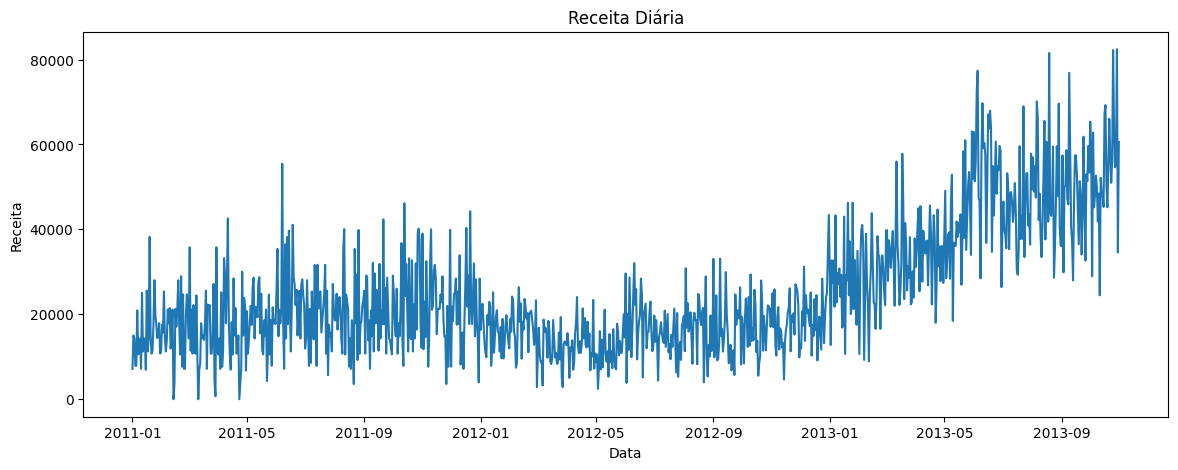

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_daily["data"], df_daily["receita_diaria"])
plt.title("Receita Diária")
plt.xlabel("Data")
plt.ylabel("Receita")
plt.show()

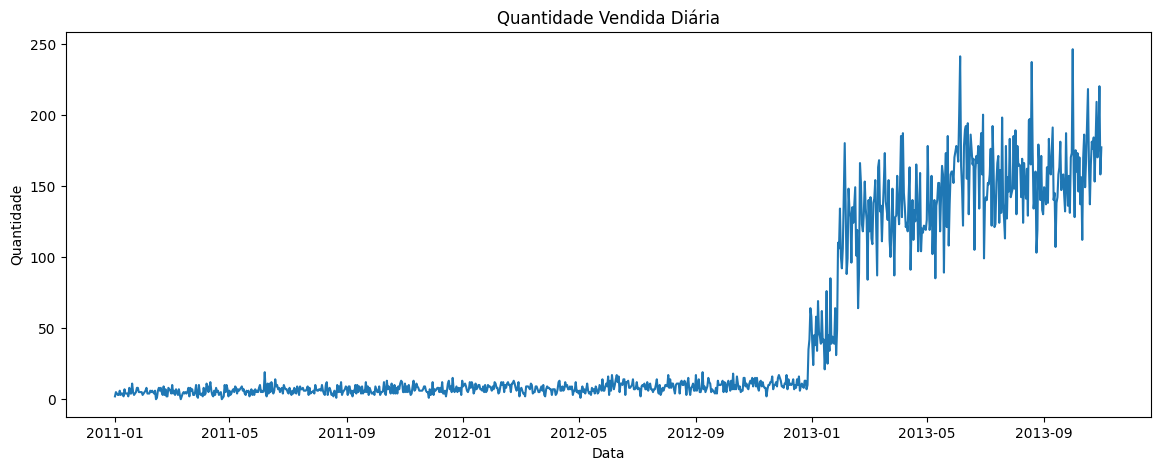

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_daily["data"], df_daily["qtd_diaria"])
plt.title("Quantidade Vendida Diária")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()

### Criação de colunas auxiliares

---



In [ ]:
df_daily["ano"] = df_daily["data"].dt.year
df_daily["mes"] = df_daily["data"].dt.month
df_daily["dia_semana"] = df_daily["data"].dt.dayofweek
df_daily["fim_de_semana"] = df_daily["dia_semana"].isin([5,6]).astype(int)

In [ ]:
df_daily.to_csv("vendas_diarias.csv", index=False) #salvando a base diaria